## TRABAJO DE TITULACIÓN   - Grupo 8

 * Carlos Guzmán
 * Diego Salazar
 * Jonathan Barrionuevo
 * Nicole Molina

## FASE 1 - PREPARACIÓN DEL DATASET



### Carga del Dataset desde carpeta Dataset

In [27]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
dataset_path = '/workspace/Dataset/grupo8_dataset.csv'
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas para verificar la carga
df.head()


,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Zaman U.,"Zaman, Umer (57207206856)",57207206856,Nexus of Regenerative Tourism Destination Comp...,2024,Sustainability (Switzerland),16,17,7827,NaN,...,NaN,NaN,NaN,English,Sustainability,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85203995839
1,Khan N.A.; Maialeh R.; Akhtar M.; Ramzan M.,"Khan, Naseer Abbas (57202611305); Maialeh, Rob...",57202611305; 56528513300; 58138387200; 5926694...,The Role of AI Self-Efficacy in Religious Cont...,2024,Public Organization Review,24,3,NaN,1015,...,NaN,NaN,NaN,English,Public. Organ. Rev.,Article,Final,NaN,Scopus,2-s2.0-85192793417
2,Mili K.,"Mili, Khaled (58884148700)",58884148700,Container Classification: A Hybrid AHP-CNN App...,2024,Journal of Maritime Research,21,2,NaN,381,...,NaN,NaN,NaN,English,J. Marit. Res.,Article,Final,NaN,Scopus,2-s2.0-85206002183
3,Manoharan G.; Ashtikar S.P.; Kumar S.,"Manoharan, Geetha (57544026100); Ashtikar, Sun...",57544026100; 57989302300; 57226008733,Delineation of artificial intelligence in the ...,2024,Impact of AI and Tech-Driven Solutions in Hosp...,NaN,NaN,NaN,20,...,979-836936757-5; 979-836936755-1,NaN,NaN,English,Impact of AI and Tech-Driven Solut. in Hosp. a...,Book chapter,Final,NaN,Scopus,2-s2.0-85204335784
4,Sharma M.; Singh A.; Rohit,"Sharma, Milan (58789367400); Singh, Amrik (572...",58789367400; 57210277581; 58789367300,Embracing technological disruption: Exploring ...,2024,Impact of AI and Tech-Driven Solutions in Hosp...,NaN,NaN,NaN,123,...,979-836936757-5; 979-836936755-1,NaN,NaN,English,Impact of AI and Tech-Driven Solut. in Hosp. a...,Book chapter,Final,NaN,Scopus,2-s2.0-85204335663


### Limpieza de Datos

Se debe realizar una limpieza de los datos, dado que gran parte de ellos no presentan relevancia para el análisis que debemos realizar, para ello nos quedaremos únicamente con las columnas:
* Author(s) ID
* Title
* Year
* Abstract
* Author Keywords
* Index Keywords
* Language of Original Document
* Document Type

In [28]:
# Seleccionar solo las columnas necesarias
df_cleaned = df[['Author(s) ID', 'Title', 'Year', 'Abstract', 'Author Keywords', 'Index Keywords', 'Language of Original Document', 'Document Type']]

# Mostrar las primeras 5 filas del DataFrame limpiado
df_cleaned.head()

,Author(s) ID,Title,Year,Abstract,Author Keywords,Index Keywords,Language of Original Document,Document Type
0,57207206856,Nexus of Regenerative Tourism Destination Comp...,2024,The Game Theory is aiding global tourism resea...,climate advocacy; destination competitiveness;...,advocacy; climate change; competitiveness; eco...,English,Article
1,57202611305; 56528513300; 58138387200; 5926694...,The Role of AI Self-Efficacy in Religious Cont...,2024,This study seeks to examine the relationship b...,AI Chatbot Use; AI self-efficacy; AI-Tech Trus...,NaN,English,Article
2,58884148700,Container Classification: A Hybrid AHP-CNN App...,2024,This research presents a groundbreaking approa...,Analytic Hierarchy Process; artificial intelli...,NaN,English,Article
3,57544026100; 57989302300; 57226008733,Delineation of artificial intelligence in the ...,2024,By understanding how AI affects organizational...,NaN,NaN,English,Book chapter
4,58789367400; 57210277581; 58789367300,Embracing technological disruption: Exploring ...,2024,"In recent years, the tourist and hospitality b...",NaN,NaN,English,Book chapter


Una vez hemos limpiado el Dataset, deberemos proceder con la reducción de dimensionalidad de la columnas de Keywords.

La razón por la que unificamos las columnas 'Author Keywords' y 'Index Keywords' en una sola columna de 'Keywords' es para:

* Eliminar redundancias: Tener dos columnas separadas para las palabras clave puede generar duplicación innecesaria de información. Al unificar ambas columnas y eliminar los duplicados, reducimos la dimensionalidad del dataset sin perder información valiosa.

* Simplificar el análisis: Al consolidar las palabras clave en una sola columna, el análisis posterior y el preprocesamiento se vuelven más manejables, ya que los modelos de machine learning pueden trabajar más fácilmente con una única fuente de palabras clave.

* Mejora de la representación de los datos: Esta fusión proporciona una representación más precisa de las palabras clave asociadas a cada documento, evitando posibles confusiones o inconsistencias en el análisis.

In [29]:
# Crear una copia del DataFrame original
df_cleaned = df_cleaned.copy()

# Rellenar valores nulos de 'Author Keywords' e 'Index Keywords'
df_cleaned['Author Keywords'] = df_cleaned['Author Keywords'].fillna('')
df_cleaned['Index Keywords'] = df_cleaned['Index Keywords'].fillna('')

# Crear la nueva columna 'Keywords' sin valores duplicados y ordenada alfabéticamente
df_cleaned['Keywords'] = df_cleaned.apply(
    lambda row: ', '.join(sorted(set((row['Author Keywords'] + ', ' + row['Index Keywords']).split(', ')))), axis=1
)

# Seleccionar las columnas para el DataFrame reducido
df_reduced = df_cleaned[['Author(s) ID', 'Title', 'Year', 'Abstract', 'Keywords', 'Language of Original Document', 'Document Type']]

# Mostrar las primeras filas del DataFrame reducido
df_reduced.head()


,Author(s) ID,Title,Year,Abstract,Keywords,Language of Original Document,Document Type
0,57207206856,Nexus of Regenerative Tourism Destination Comp...,2024,The Game Theory is aiding global tourism resea...,advocacy; climate change; competitiveness; eco...,English,Article
1,57202611305; 56528513300; 58138387200; 5926694...,The Role of AI Self-Efficacy in Religious Cont...,2024,This study seeks to examine the relationship b...,", AI Chatbot Use; AI self-efficacy; AI-Tech Tr...",English,Article
2,58884148700,Container Classification: A Hybrid AHP-CNN App...,2024,This research presents a groundbreaking approa...,", Analytic Hierarchy Process; artificial intel...",English,Article
3,57544026100; 57989302300; 57226008733,Delineation of artificial intelligence in the ...,2024,By understanding how AI affects organizational...,,English,Book chapter
4,58789367400; 57210277581; 58789367300,Embracing technological disruption: Exploring ...,2024,"In recent years, the tourist and hospitality b...",,English,Book chapter


#### Tratamiento de datos Nulos

In [30]:
# Calcular los valores nulos por columna
nulos_por_columna = df_reduced.isnull().sum()

# Crear un DataFrame para mostrar los valores nulos
nulos_df = pd.DataFrame({
    'Column': nulos_por_columna.index,
    'Null Values': nulos_por_columna.values
})

# Mostrar el DataFrame de valores nulos
nulos_df

,Column,Null Values
0,Author(s) ID,143
1,Title,0
2,Year,0
3,Abstract,0
4,Keywords,0
5,Language of Original Document,0
6,Document Type,0


Verificamos que tenemos 31 artículos sin ID de autor, por lo cuál se realiza el tratamiento de estos con la etiqueta noID

In [32]:
df_reduced.loc[:, 'Author(s) ID'] = df_reduced['Author(s) ID'].fillna('NoID')

# Verificar que los valores nulos se han reemplazado correctamente
print(df_reduced.isnull().sum())



Author(s) ID                     0
Title                            0
Year                             0
Abstract                         0
Keywords                         0
Language of Original Document    0
Document Type                    0
dtype: int64


## FASE 2 - EXPLORACIÓN INICIAL



En esta sección, realizaremos una **exploración inicial** del dataset para entender mejor la distribución y las características de los datos antes de proceder con el preprocesamiento y la construcción del modelo de clasificación.

Este análisis incluye:

1. **Distribución de Artículos por Año**: Exploraremos la cantidad de artículos publicados en cada año para observar posibles patrones o incrementos en la producción académica sobre turismo.

2. **Distribución de la Cantidad de Palabras en los Abstracts**: Analizaremos la longitud de los abstracts en términos de cantidad de palabras. Esto es relevante para el modelo de RNN, ya que nos permitirá definir el tamaño de las secuencias de entrada.

3. **Distribución de Tipos de Documentos**: Observaremos los diferentes tipos de documentos en el dataset para identificar qué tipos predominan, lo cual puede ser útil en el análisis y filtrado de los datos.

4. **Distribución de Idiomas de los Documentos**: Verificaremos los idiomas en los que están escritos los artículos para asegurar que la mayoría esté en un idioma adecuado para el procesamiento (por ejemplo, inglés).

5. **Análisis de Frecuencia de Palabras Clave**: Realizaremos un análisis de las palabras clave más comunes para identificar los temas y términos más frecuentes en la investigación sobre turismo.

Estos gráficos y análisis nos proporcionarán una **visión general del dataset** y nos ayudarán a tomar decisiones informadas en los siguientes pasos de preprocesamiento y entrenamiento del modelo.


### Análisis 1: Distribución de artículos por año

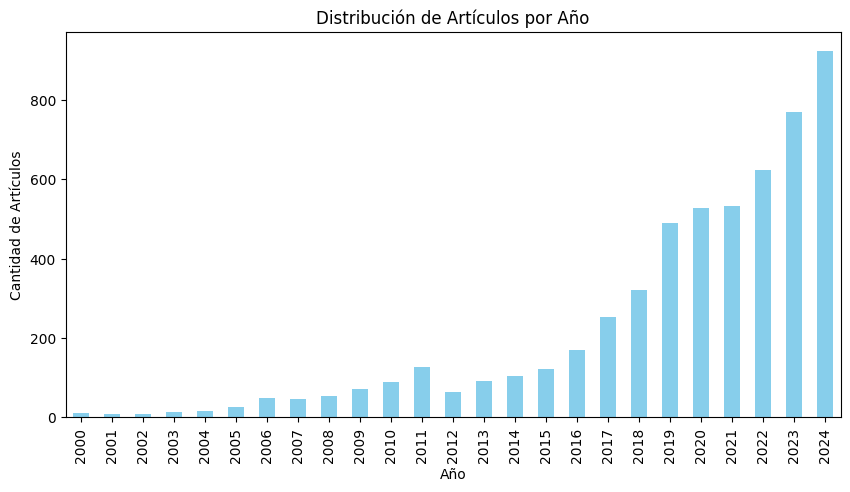

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
df_reduced['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Artículos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Artículos')
plt.show()

- **Tendencia General**: Observamos un aumento en la cantidad de artículos desde el año 2019 hasta el 2023, lo cual indica un creciente interés en la temática de investigación.
  
- **Pico de Publicaciones en 2023**: El año 2023 muestra la mayor cantidad de publicaciones, lo que podría sugerir que el tema alcanzó un punto alto de relevancia en la comunidad académica en ese año. Esto también podría estar relacionado con eventos globales, como políticas sostenibles, cambios en el turismo post-pandemia o avances en la tecnología de análisis de datos en turismo.
  
- **Descenso en 2024**: Aunque el año 2024 aún no ha finalizado, la gráfica muestra una disminución en la cantidad de publicaciones. Esto puede deberse a varios factores:
  - **Datos Parciales**: Es posible que los datos de 2024 aún no estén completos, especialmente si la recopilación se realizó en los primeros meses del año.
  - **Desplazamiento de Enfoque**: Puede ser que el interés en el tema esté disminuyendo, o que los investigadores estén explorando nuevas áreas relacionadas.

- **Impacto de la Pandemia (2020-2021)**: Los años 2020 y 2021 muestran una ligera disminución en la cantidad de publicaciones, lo cual podría estar relacionado con la pandemia de COVID-19, que afectó significativamente la investigación y publicación académica. Durante este período, muchos sectores, incluido el turismo, enfrentaron desafíos que pudieron haber impactado la producción académica.


### Análisis 2: Distribución de longitud de abstracts

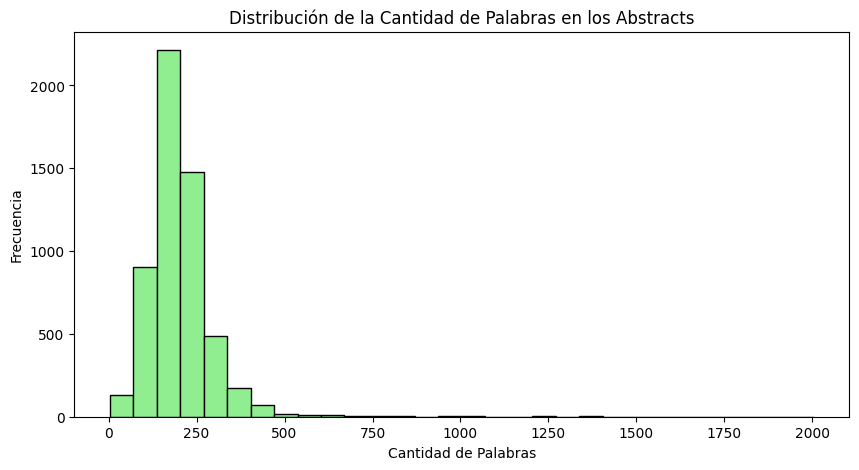

In [34]:
 
df_reduced = df_reduced.copy()  # Crear una copia explícita 

# Añadir la columna 'Abstract Length' de manera segura
df_reduced.loc[:, 'Abstract Length'] = df_reduced['Abstract'].apply(lambda x: len(str(x).split()))

# Visualización de la distribución de longitud de los abstracts
plt.figure(figsize=(10, 5))
df_reduced['Abstract Length'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de la Cantidad de Palabras en los Abstracts')
plt.xlabel('Cantidad de Palabras')
plt.ylabel('Frecuencia')
plt.show()


- **Tendencia General**: La mayoría de los abstracts contienen entre 150 y 350 palabras. Esto sugiere un estándar en la longitud de los resúmenes, posiblemente determinado por los requisitos de las revistas o conferencias académicas.

- **Pico en la Frecuencia de Palabras**: Observamos un pico en la frecuencia entre 200 y 250 palabras. Esto indica que muchos autores eligen mantener sus resúmenes en ese rango de palabras, lo cual puede responder a normas editoriales o a un intento de sintetizar la investigación de manera concisa y efectiva.

- **Distribución Asimétrica**: La distribución tiene una cola hacia la derecha, lo cual significa que aunque la mayoría de los abstracts se encuentran en el rango estándar, existen algunos con una mayor cantidad de palabras, llegando incluso a superar las 1000. Estos casos podrían ser excepcionales y responder a investigaciones con mayores detalles, múltiples hipótesis o explicaciones complejas.

- **Conclusión**: La distribución de longitud de los abstracts en este análisis sugiere que la comunidad académica en el campo tiende a producir resúmenes que son concisos y que cumplen con los límites de palabras recomendados, permitiendo una rápida comprensión de los objetivos y resultados de la investigación.


###  Análisis 3: Distribución de tipos de documentos

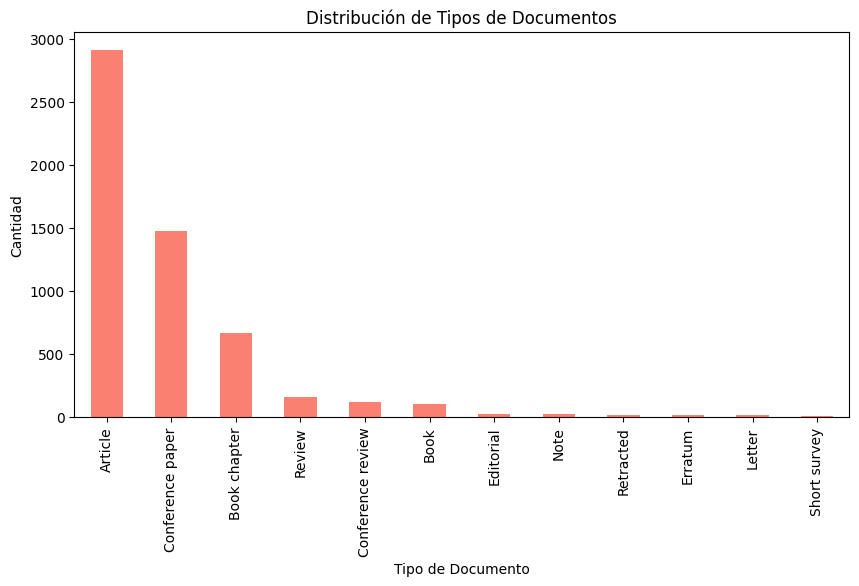

In [35]:
plt.figure(figsize=(10, 5))
df_reduced['Document Type'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribución de Tipos de Documentos')
plt.xlabel('Tipo de Documento')
plt.ylabel('Cantidad')
plt.show()

#### Análisis de la Distribución de Tipos de Documentos

- **Distribución General**: La mayoría de los documentos en el dataset son artículos ("Article"), con una gran diferencia frente a otros tipos de documentos como "Conference paper" y "Book chapter". Los artículos representan la clase más dominante, superando significativamente en cantidad a todas las demás categorías.

- **Desbalance de Clases**: Existe un fuerte desbalance de clases, lo cual podría afectar el entrenamiento de modelos de aprendizaje automático si se utiliza esta clasificación. Los modelos tienden a inclinarse hacia la clase mayoritaria, reduciendo su capacidad para predecir correctamente las clases menos representadas.

#### Posibles Estrategias para Abordar el Desbalance

1. **Submuestreo de la Clase Mayoritaria**: Reducir la cantidad de artículos ("Article") en el dataset, seleccionando aleatoriamente una muestra de estos, para equilibrar su proporción con las otras categorías.

2. **Aumento de las Clases Minoritarias**: Utilizar técnicas de aumento de datos, como generación sintética de datos o duplicación de documentos de las clases menos representadas, para incrementar su proporción.

3. **Pesos de Clase en Modelos de ML**: Ajustar los pesos de las clases en función de su distribución para penalizar errores en las clases minoritarias de manera más significativa. Esto obligaría al modelo a prestar más atención a las clases menos comunes.

4. **Agrupación de Clases**: Otra opción podría ser combinar algunas de las clases menos comunes en una categoría única de "Otros" para simplificar el análisis y reducir el impacto del desbalance extremo.




### Análisis 4: Distribución de idiomas

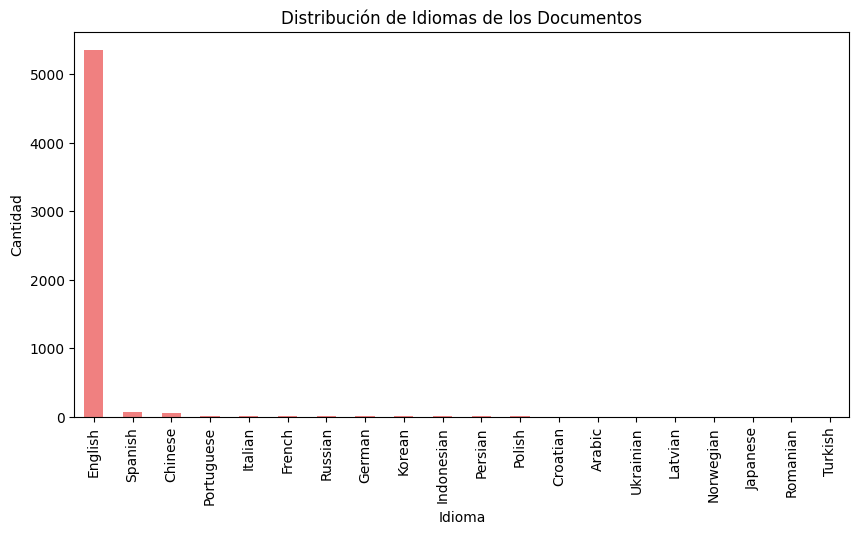

In [36]:
plt.figure(figsize=(10, 5))
df_reduced['Language of Original Document'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribución de Idiomas de los Documentos')
plt.xlabel('Idioma')
plt.ylabel('Cantidad')
plt.show()



- **Distribución General**: La gran mayoría de los documentos están en inglés, lo que indica que el inglés es el idioma dominante en el campo de investigación. Otros idiomas, como el chino y el español, tienen una representación significativamente menor, seguidos por otros idiomas con aún menor frecuencia.

La predominancia del inglés como idioma de publicación puede sesgar los resultados del análisis hacia una perspectiva cultural anglófona. 


### Análisis 5: Frecuencia de palabras clave

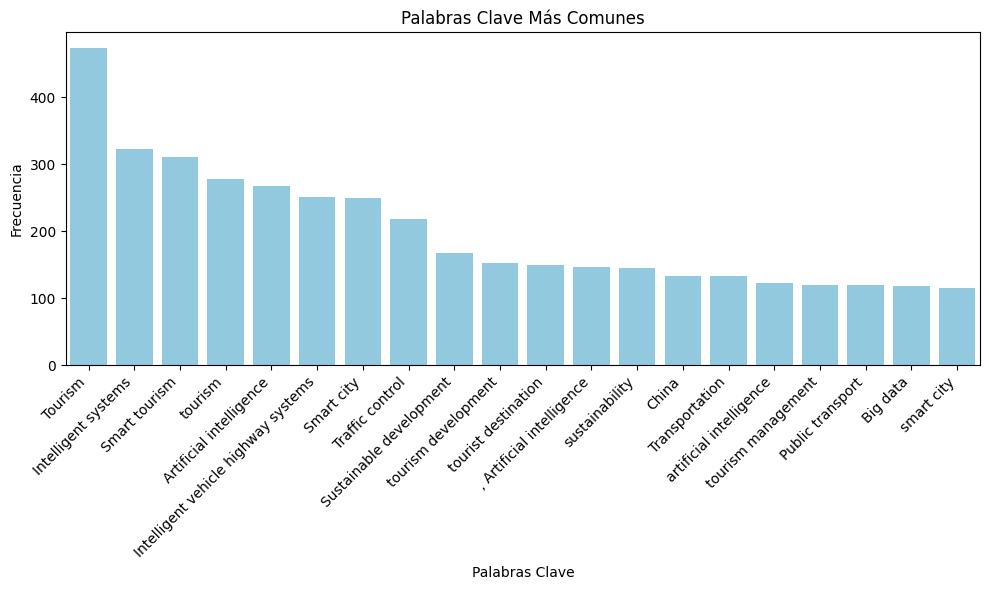

In [37]:
# Filtrar palabras clave no válidas (vacías o solo espacios)
all_keywords = df_reduced['Keywords'].str.split(';').explode().str.strip()
all_keywords = all_keywords[all_keywords != ""]  # Remover palabras clave vacías

# Contar la frecuencia de cada palabra clave
df_keywords = all_keywords.value_counts().reset_index()
df_keywords.columns = ['Palabra Clave', 'Frecuencia']

# Filtrar para mostrar solo las N palabras clave más comunes
top_keywords = df_keywords.head(20)  # Ajusta el número según necesites

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=top_keywords, x='Palabra Clave', y='Frecuencia', color='skyblue')

# Rotar etiquetas en el eje x para mejorar legibilidad
plt.xticks(rotation=45, ha="right")
plt.xlabel("Palabras Clave")
plt.ylabel("Frecuencia")
plt.title("Palabras Clave Más Comunes")
plt.tight_layout()
plt.show()

##### Análisis de las Palabras Clave Más Comunes

- **Frecuencia y Temáticas Predominantes**: Las palabras clave más frecuentes reflejan temas relacionados con **sistemas inteligentes**, **turismo inteligente**, y **desarrollo sostenible**. Esto indica un fuerte interés en la integración de tecnología avanzada, como **inteligencia artificial** y **sistemas inteligentes de vehículos**, en el contexto del turismo. Estos temas sugieren una intersección entre turismo y tecnología, así como un enfoque en la sostenibilidad.

- **Variabilidad Temática**: Además del turismo y la sostenibilidad, palabras clave como **control de tráfico** y **ciudades inteligentes** sugieren un enfoque en la infraestructura y el manejo de recursos para facilitar el turismo en entornos urbanos.

- **Distribución Geográfica y Específica**: Palabras como **China** y **transporte público** figuran entre las más comunes, lo que señala un interés tanto en el contexto geográfico como en el transporte en el turismo. Esto puede indicar la relevancia de estas áreas en el desarrollo de soluciones tecnológicas y sostenibles.

##### Estrategias para Profundizar el Análisis

1. **Agrupación Semántica**: Agrupar términos similares, como aquellos relacionados con **tecnología** y **turismo inteligente**, puede ayudar a identificar patrones más amplios y reducir redundancia en el análisis de palabras clave.

2. **Análisis de Bigrama y Trigrama**: Dado que algunas palabras clave aparecen en combinaciones (como "smart tourism" y "sustainable development"), un análisis de bigramas y trigramas permitirá descubrir relaciones temáticas más profundas y mejorar la comprensión de las tendencias en la investigación.

3. **Segmentación Temporal o Geográfica**: Analizar cómo cambian estas palabras clave con el tiempo o en distintas regiones podría proporcionar una perspectiva sobre la evolución de los temas y su relevancia en contextos específicos.

##### Conclusión
La distribución de las palabras clave indica un enfoque en **turismo inteligente** y **sistemas tecnológicos aplicados al turismo**, así como en la **sostenibilidad** y el **control de infraestructuras urbanas**. Este análisis inicial de palabras clave aporta una visión general de las tendencias temáticas en el campo, pero podría beneficiarse de técnicas de agrupación avanzada y de un análisis de bigramas y trigramas para explorar más a fondo las conexiones entre temas.


#### Análisis 5.1: Análisis de Bigramas 

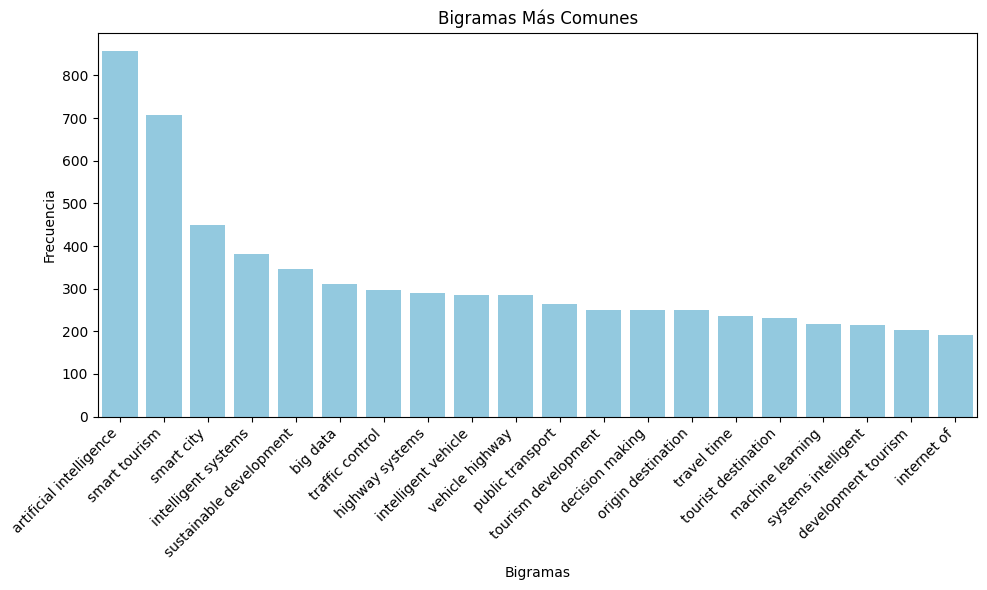

In [38]:
from sklearn.feature_extraction.text import CountVectorizer


text_data = df_reduced['Keywords'].dropna().values

# Configurar CountVectorizer para bigramas
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = vectorizer.fit_transform(text_data)

# Obtener el conteo de bigramas
bigram_counts = bigram_matrix.sum(axis=0).A1
bigram_words = vectorizer.get_feature_names_out()

# Crear un DataFrame de bigramas y su frecuencia
bigram_df = pd.DataFrame({'Bigrama': bigram_words, 'Frecuencia': bigram_counts})
bigram_df = bigram_df.sort_values(by='Frecuencia', ascending=False).head(20)

# Visualizar los bigramas más comunes
plt.figure(figsize=(10, 6))
sns.barplot(data=bigram_df, x='Bigrama', y='Frecuencia', color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Bigramas")
plt.ylabel("Frecuencia")
plt.title("Bigramas Más Comunes")
plt.tight_layout()
plt.show()


#### Análisis de los Bigrama Más Comunes

- **Frecuencia y Temas Recurrentes**: Los bigramas más frecuentes, como "artificial intelligence", "smart tourism", y "smart city", reflejan una alta prevalencia de términos relacionados con tecnología avanzada aplicada al turismo y el desarrollo de ciudades inteligentes. Estos resultados subrayan el enfoque en el uso de inteligencia artificial y sistemas inteligentes dentro del contexto del turismo y la gestión urbana.

- **Relación entre Conceptos Clave**: La presencia de bigramas como "sustainable development", "traffic control", y "public transport" indica que, además del turismo inteligente, la sostenibilidad y la infraestructura son temas relevantes en la investigación académica. Estos términos sugieren un interés en el impacto de la tecnología en la sostenibilidad y en cómo gestionar eficientemente los recursos en entornos turísticos.

- **Evolución y Enfoque Temático**: La inclusión de términos como "machine learning" y "big data" destaca el crecimiento en el uso de técnicas de análisis avanzadas para abordar problemas en el turismo y la sostenibilidad. Esto refleja una tendencia hacia el uso de datos y tecnologías emergentes para mejorar la experiencia turística y la eficiencia operativa en ciudades.

- **Desafíos de Análisis y Agrupación**: La alta frecuencia de bigramas relacionados con tecnología y sostenibilidad podría generar redundancia en el análisis. Esto sugiere la necesidad de agrupar o normalizar términos similares en futuras investigaciones, con el fin de reducir la repetición y obtener una visión más clara de los temas predominantes.

##### Estrategias para el Análisis

1. **Análisis de Trigramas**: Ampliar el análisis a trigramas permitirá captar combinaciones de temas más específicas y complejas, como "smart tourism management" o "sustainable urban development", lo cual podría ofrecer una visión más detallada de las interrelaciones entre temas.

2. **Segmentación Temática**: Dado el enfoque en sostenibilidad, tecnología avanzada y gestión urbana, se podrían crear subgrupos temáticos para analizar cada área en profundidad, permitiendo así explorar las interacciones entre tecnología y sostenibilidad en el turismo.

3. **Análisis Temporal**: Examinar cómo cambian estos bigramas en el tiempo podría revelar tendencias emergentes y mostrar cómo han evolucionado los temas de investigación a lo largo de los años en respuesta a los avances tecnológicos y los desafíos ambientales.

##### Conclusión
El análisis de bigramas confirma que los estudios de turismo están centrados en temas de sostenibilidad y tecnología avanzada. Los bigramas dominantes sugieren una tendencia hacia la adopción de inteligencia artificial, el desarrollo de ciudades inteligentes, y la gestión de recursos sostenibles. Estos hallazgos ofrecen una base sólida para orientar futuras investigaciones y destacan la necesidad de un enfoque más estructurado en la segmentación temática para minimizar la redundancia y profundizar en las relaciones entre temas clave.


#### Análisis 5.2 : Análisis de Trigramas

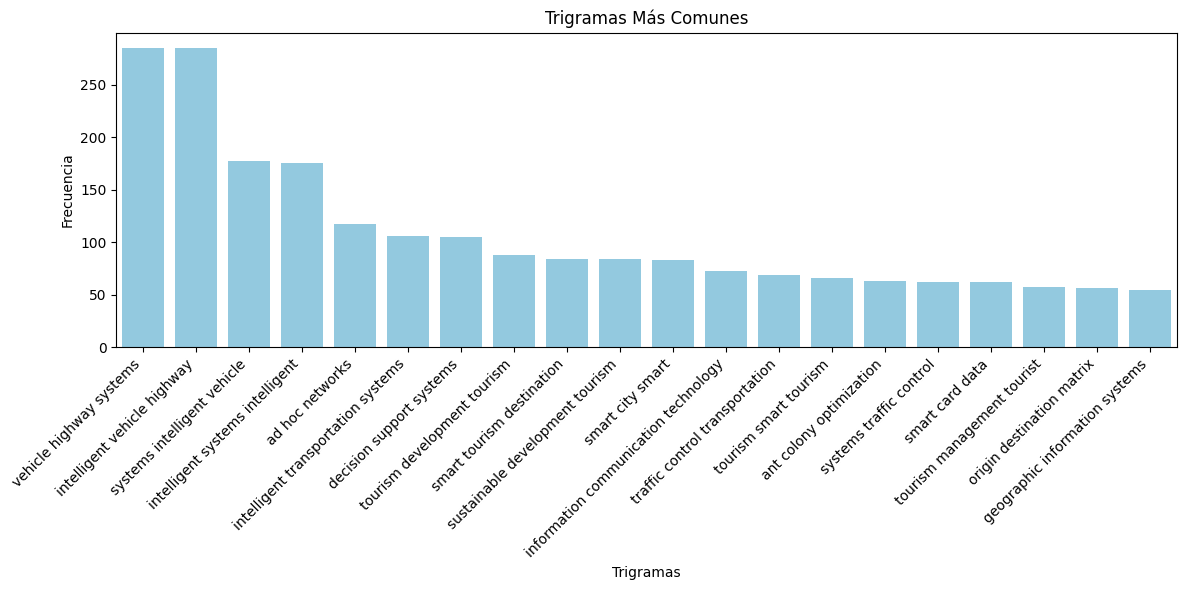

In [39]:

# Crear el vectorizador para trigramas
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
X = vectorizer.fit_transform(df_reduced['Keywords'])

# Obtener los trigramas más frecuentes
trigram_counts = X.toarray().sum(axis=0)
trigrams = vectorizer.get_feature_names_out()
df_trigrams = pd.DataFrame({'Trigramas': trigrams, 'Frecuencia': trigram_counts})
df_trigrams = df_trigrams.sort_values(by='Frecuencia', ascending=False).head(20)  # Top 20 trigramas

# Graficar los trigramas más comunes
plt.figure(figsize=(12, 6))
sns.barplot(data=df_trigrams, x='Trigramas', y='Frecuencia', color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Trigramas")
plt.ylabel("Frecuencia")
plt.title("Trigramas Más Comunes")
plt.tight_layout()
plt.show()


#### Observación General

El gráfico de trigramas muestra combinaciones de tres palabras clave que ocurren con mayor frecuencia en los resúmenes de los artículos analizados. A continuación, se destacan algunas de las combinaciones más relevantes:

1. **Principales Temáticas**: Los trigramas más destacados están relacionados con términos como _“vehicle highway systems”_, _“intelligent vehicle highway”_, y _“systems intelligent vehicle”_. Esto refleja un enfoque significativo en la intersección entre sistemas de transporte inteligente y vehículos autónomos, indicando el interés en la infraestructura y gestión de sistemas de transporte avanzados.

2. **Tecnología y Turismo Inteligente**: Otros trigramas relevantes como _“smart tourism development”_, _“sustainable development tourism”_, y _“smart city smart”_ sugieren que los estudios también están explorando cómo las tecnologías avanzadas y las ciudades inteligentes están afectando al desarrollo del turismo. Este énfasis en el "turismo inteligente" subraya la transformación digital en el sector turístico.

3. **Evaluación y Gestión del Transporte**: Trigramas como _“traffic control transportation”_ y _“tourism traffic control”_ destacan el interés en la gestión y control del tráfico, especialmente en áreas con alto flujo turístico. Esto sugiere que una parte de la investigación está orientada a optimizar el flujo de visitantes en destinos turísticos para reducir la congestión y mejorar la experiencia del turista.

4. **Sistemas de Apoyo a la Decisión**: La presencia de trigramas como _“decision support systems”_ indica el uso de sistemas de apoyo a la decisión en la planificación y gestión del turismo y el transporte. Estos sistemas ayudan a las autoridades y empresas a tomar decisiones informadas en tiempo real.

##### Implicaciones para la Investigación

Este análisis de trigramas revela áreas específicas dentro del turismo y el transporte inteligente que están siendo exploradas con mayor profundidad:

* **Turismo Inteligente y Desarrollo Sostenible**: Existe un interés notable en cómo las ciudades inteligentes y las tecnologías avanzadas pueden contribuir al turismo sostenible y a una mejor experiencia del turista.

* **Control y Gestión del Tráfico**: La gestión del tráfico es una preocupación central, lo cual es esencial para destinos turísticos populares que buscan equilibrar la afluencia de visitantes con la sostenibilidad.

* **Sistemas de Apoyo a la Decisión**: La implementación de sistemas de apoyo a la decisión se está convirtiendo en una herramienta valiosa para gestionar eficazmente los recursos en entornos turísticos.

* **Infraestructura Inteligente y Vehículos Autónomos**: La infraestructura de sistemas de transporte inteligente y vehículos autónomos está recibiendo atención significativa, lo cual puede transformar el turismo y la movilidad en el futuro.

Este análisis de trigramas proporciona una comprensión más clara de cómo los temas tecnológicos y de sostenibilidad convergen en la investigación del turismo, ofreciendo perspectivas que pueden guiar futuras investigaciones y desarrollos en el campo.


## FASE 3 - DEFINIR VARIABLES DE CLASIFICACIÓN (ABSTRACT, KEYWORDS) - LDA

### 3.1 Análisis de Perplejidad

Perplejidad para 2 temas: 2154.428897055888
Perplejidad para 3 temas: 1984.1264258719402
Perplejidad para 4 temas: 1942.7417780818455
Perplejidad para 5 temas: 1935.9838410453176
Perplejidad para 6 temas: 1913.877424538906
Perplejidad para 7 temas: 1897.7333840731535
Perplejidad para 8 temas: 1860.013184377949
Perplejidad para 9 temas: 1846.6309004082134
Perplejidad para 10 temas: 1842.2912924691352
Perplejidad para 11 temas: 1845.3857016655686
Perplejidad para 12 temas: 1842.8047878490863
Perplejidad para 13 temas: 1826.8516516007387
Perplejidad para 14 temas: 1827.0306070535407
Perplejidad para 15 temas: 1815.0274477276162
Perplejidad para 16 temas: 1824.1983836150068
Perplejidad para 17 temas: 1827.0934817000073
Perplejidad para 18 temas: 1818.69925196049
Perplejidad para 19 temas: 1828.3261668950868
Perplejidad para 20 temas: 1837.3597789262876
Perplejidad para 21 temas: 1838.9564450737735
Perplejidad para 22 temas: 1836.2622892960496
Perplejidad para 23 temas: 1843.4801840897817
P

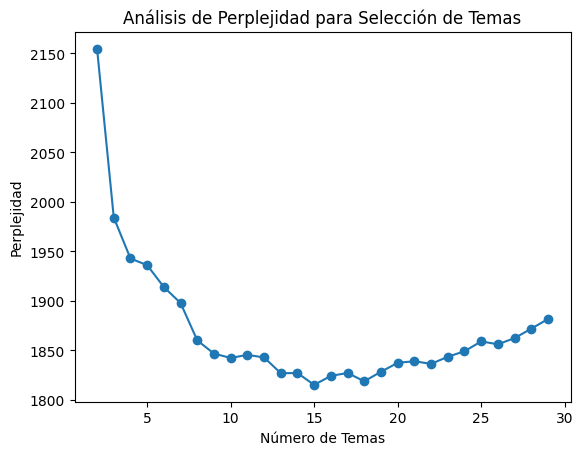

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Preparación de los datos de texto
text_data = df_reduced['Abstract'] + " " + df_reduced['Keywords']
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
text_vectors = vectorizer.fit_transform(text_data)

# Prueba de diferentes números de temas y cálculo de perplejidad
perplexity_scores = []
topic_range = range(2, 30)  # Rango de temas a probar
for num_topics in topic_range:
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(text_vectors)
    perplexity = lda_model.perplexity(text_vectors)
    perplexity_scores.append(perplexity)
    print(f"Perplejidad para {num_topics} temas: {perplexity}")

# Graficar la perplejidad para observar el punto de inflexión
plt.plot(topic_range, perplexity_scores, marker='o')
plt.xlabel("Número de Temas")
plt.ylabel("Perplejidad")
plt.title("Análisis de Perplejidad para Selección de Temas")
plt.show()


#### Selección del Número Óptimo de Temas Basado en la Perplejidad

Para determinar el número óptimo de temas en nuestro análisis de tópicos, hemos realizado un análisis de perplejidad. La perplejidad es una métrica que evalúa qué tan bien un modelo LDA se ajusta a los datos, donde valores más bajos indican un mejor ajuste. Hemos calculado la perplejidad para un rango de temas de 2 a 29 y observado cómo cambia la métrica en función del número de temas.


#### Observaciones y Justificación del Número de Temas

- **Punto de Inflexión**: Observamos que la perplejidad disminuye significativamente al aumentar el número de temas hasta aproximadamente 10 temas, lo que indica una mejora sustancial en el ajuste del modelo. Sin embargo, después de este punto, la reducción de la perplejidad se vuelve menos pronunciada.
  
- **Estabilización y Aumento Posterior**: A partir de 10 a 15 temas, la perplejidad se estabiliza e incluso muestra una ligera tendencia al aumento, sugiriendo que añadir más temas no proporciona una mejora significativa en la calidad del modelo y podría introducir ruido innecesario.

- **Número Óptimo de Temas**: Con base en estos resultados, hemos determinado que el rango de 10 a 15 temas captura adecuadamente la variabilidad en nuestros datos sin añadir complejidad innecesaria. Este rango ofrece un buen equilibrio entre interpretabilidad y precisión, siendo particularmente útil para un análisis académico que busca identificar tendencias significativas sin sobrecargar el modelo.

#### Conclusión

Seleccionaremos entre 10 y 15 temas como el número óptimo para nuestro modelo LDA, ya que este rango proporciona un ajuste adecuado y permite interpretar los temas de manera efectiva. Esta elección está respaldada por el análisis de perplejidad, que muestra que añadir más temas no reduce significativamente la perplejidad y, por lo tanto, no mejora la calidad del modelo.


### 3.2 Implementación LDA - Exploratorio

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocesamiento: Combinar los textos de Abstract y Keywords.
text_data = df_reduced['Abstract'] + " " + df_reduced['Keywords']

# Vectorización: Crear una matriz de términos utilizando CountVectorizer.
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
text_vectors = vectorizer.fit_transform(text_data)

# LDA: Configuramos el número de temas
num_topics = 12  # Número de temas basado en el análisis de perplejidad
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(text_vectors)

# Visualizar las palabras clave de cada tema
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    print(f"Tema {i+1}: ", [terms[i] for i in topic.argsort()[-10:]])

# Asignar el tema más probable a cada documento
df_reduced.loc[:, 'Topic_Label'] = lda_model.transform(text_vectors).argmax(axis=1)

# Verificar la distribución de documentos por tema
print(df_reduced['Topic_Label'].value_counts())

Tema 1:  ['travel', 'intelligence', 'new', 'marketing', 'heritage', 'media', 'digital', 'tourism', 'social', 'cultural']
Tema 2:  ['industry', 'destination', 'hospitality', 'data', 'technology', 'study', 'ai', 'research', 'smart', 'tourism']
Tema 3:  ['behavior', 'smart', 'based', 'traffic', 'travel', 'spatial', 'time', 'analysis', 'parking', 'data']
Tema 4:  ['areas', 'local', 'sustainable', 'tourism', 'tourist', 'development', 'cities', 'urban', 'city', 'smart']
Tema 5:  ['data', 'destination', 'time', 'transit', 'smart', 'mobility', 'travel', 'public', 'transportation', 'transport']
Tema 6:  ['chain', 'technology', 'supply', 'blockchain', 'health', 'pandemic', 'covid', '19', 'industry', 'tourism']
Tema 7:  ['intention', 'smart', 'perceived', 'research', 'satisfaction', 'destination', 'tourist', 'tourists', 'study', 'tourism']
Tema 8:  ['intelligent', 'virtual', 'navigation', 'users', 'reality', 'based', 'user', 'systems', 'mobile', 'information']
Tema 9:  ['data', 'systems', 'destin

#### Interpretación de los Temas Identificados

1.  **Tema 1: Turismo Digital y Patrimonio Cultural**
    
    *   **Palabras Clave**: travel, intelligence, marketing, heritage, media, digital, tourism, social, cultural
        
    *   **Descripción**: Este tema se centra en la integración de la tecnología digital y la inteligencia en la promoción del turismo cultural y de patrimonio. Examina cómo el marketing digital y los medios sociales impactan el turismo, en particular en destinos culturales.
        
    *   **Cantidad de Artículos**: 1233
        
2.  **Tema 6: Salud, Tecnología y Turismo en Pandemias**
    
    *   **Palabras Clave**: chain, technology, supply, blockchain, health, pandemic, covid, 19, industry, tourism
        
    *   **Descripción**: Este tema abarca la intersección entre salud y tecnología en el contexto del turismo durante pandemias, con un enfoque en tecnologías como blockchain para gestionar las cadenas de suministro de salud y el impacto de COVID-19.
        
    *   **Cantidad de Artículos**: 787
        
3.  **Tema 10: Educación y Gestión del Conocimiento en Turismo**
    
    *   **Palabras Clave**: technology, teaching, knowledge, analysis, students, design, research, education, management, based
        
    *   **Descripción**: Aborda la educación y la gestión del conocimiento en el turismo, con estudios sobre la formación de estudiantes y la gestión del conocimiento en esta industria.
        
    *   **Cantidad de Artículos**: 543
        
4.  **Tema 3: Comportamiento y Tráfico Turístico**
    
    *   **Palabras Clave**: behavior, smart, based, traffic, travel, spatial, time, analysis, parking, data
        
    *   **Descripción**: Este tema aborda el análisis del comportamiento de los turistas y la gestión del tráfico en áreas de alto turismo. Los estudios pueden incluir temas de movilidad y análisis espacial para optimizar el flujo de visitantes.
        
    *   **Cantidad de Artículos**: 496
        
5.  **Tema 7: Satisfacción e Intención de los Turistas**
    
    *   **Palabras Clave**: intention, smart, perceived, research, satisfaction, destination, tourist, tourists, study, tourism
        
    *   **Descripción**: Analiza la percepción, satisfacción e intenciones de los turistas en sus destinos, con estudios que examinan factores que influyen en la experiencia turística.
        
    *   **Cantidad de Artículos**: 420
        
6.  **Tema 4: Desarrollo Urbano y Sostenibilidad en Turismo**
    
    *   **Palabras Clave**: areas, local, sustainable, tourism, tourist, development, cities, urban, city, smart
        
    *   **Descripción**: Este tema trata sobre la sostenibilidad en el desarrollo urbano turístico, enfocándose en cómo las ciudades gestionan el turismo de una manera sostenible e inteligente, y el impacto de esto en las comunidades locales.
        
    *   **Cantidad de Artículos**: 404
        
7.  **Tema 11: Aprendizaje Inteligente y Modelos de Decisión en Turismo**
    
    *   **Palabras Clave**: destination, decision, based, intelligent, learning, time, systems, model, data, traffic
        
    *   **Descripción**: Explora modelos de aprendizaje y toma de decisiones inteligentes aplicados a la gestión del tráfico y otros sistemas en el turismo.
        
    *   **Cantidad de Artículos**: 391
        
8.  **Tema 8: Realidad Virtual y Navegación Inteligente**
    
    *   **Palabras Clave**: intelligent, virtual, navigation, users, reality, based, user, systems, mobile, information
        
    *   **Descripción**: Explora el uso de realidad virtual y tecnologías de navegación en aplicaciones móviles para enriquecer la experiencia del usuario en turismo.
        
    *   **Cantidad de Artículos**: 341
        
9.  **Tema 9: Sistemas de Comunicación y Enrutamiento**
    
   *   **Palabras Clave**: data, systems, destination, communication, algorithm, vehicle, path, networks, network, routing
       
   *   **Descripción**: Este tema se centra en los sistemas de comunicación y enrutamiento, especialmente en redes de transporte y sistemas de vehículos para mejorar la movilidad y accesibilidad turística.
       
   *   **Cantidad de Artículos**: 328
        
10.  **Tema 5: Movilidad y Transporte Público en Turismo**
    
   *   **Palabras Clave**: data, destination, time, transit, smart, mobility, travel, public, transportation, transport
       
   *   **Descripción**: Se centra en la movilidad en el turismo, particularmente en el uso y gestión del transporte público para facilitar el movimiento de turistas en destinos específicos.
       
   *   **Cantidad de Artículos**: 237
        
11.  **Tema 2: Tecnología en la Industria Turística**
    
   *   **Palabras Clave**: industry, destination, hospitality, data, technology, ai, research, smart, tourism
       
   *   **Descripción**: Este tema se enfoca en el papel de la tecnología y los datos, especialmente la inteligencia artificial, en la industria de la hospitalidad y el turismo. Los estudios bajo este tema probablemente exploran innovaciones tecnológicas que mejoran la gestión de destinos.
       
   *   **Cantidad de Artículos**: 178
        
12.  **Tema 12: Turismo Sostenible en Áreas Rurales y Gestión Regional**
    
   *   **Palabras Clave**: regional, management, green, rural, energy, economic, environmental, sustainable, development, tourism
       
   *   **Descripción**: Este tema se centra en la sostenibilidad en el turismo rural, con estudios sobre la gestión del desarrollo en áreas rurales y los impactos ambientales y económicos.
       
   *   **Cantidad de Artículos**: 167

**Enfoque General de Tendencias en Turismo**: Abarcando Sostenibilidad, Tecnología, Movilidad, y Comportamiento Turístico

Este proyecto busca identificar patrones y tendencias en la investigación académica sobre turismo en un espectro amplio de temas, con un énfasis en cómo las prácticas sostenibles, los avances tecnológicos, la movilidad, y el comportamiento de los turistas están modelando el futuro del sector. La minería de textos en resúmenes de artículos científicos permitirá explorar un conjunto amplio de áreas dentro de la investigación turística, proporcionando una visión general y profunda que abarca desde la sostenibilidad en áreas urbanas y rurales hasta la tecnología aplicada a la movilidad y la gestión de destinos.

### Justificación del Enfoque

1.  **Cobertura Integral de la Investigación en Turismo**: La elección de incluir los 12 temas permite un análisis holístico de la investigación en turismo. Al no limitar el enfoque a solo tres temas, obtenemos una representación más fiel de las áreas de interés en la academia, lo cual enriquece el análisis y proporciona un contexto más amplio.
    
2.  **Identificación de Intersecciones y Colaboraciones Potenciales**: El enfoque general permite detectar posibles puntos de conexión entre temas diversos, como la tecnología aplicada a la sostenibilidad, o la movilidad influenciada por el comportamiento del turista. Estos hallazgos pueden ser valiosos para investigadores que busquen colaborar en temas interdisciplinarios.
    
3.  **Mayor Relevancia para Políticas y Prácticas de la Industria**: Al analizar una gama amplia de temas, los resultados pueden ser útiles para un público más amplio, incluyendo responsables de políticas, empresas, y gestores de destinos que necesitan tener en cuenta múltiples aspectos del turismo, desde la gestión de recursos hasta la tecnología y el comportamiento del turista.
    
4.  **Flexibilidad para el Análisis de Tendencias Específicas**: Aunque el enfoque es general, el modelo permite filtrar y analizar tendencias específicas dentro de cada tema cuando sea necesario. Esto significa que, si un tema como "Sostenibilidad Urbana" o "Movilidad Turística" requiere atención especial, el modelo puede proporcionar insights profundos y detallados.
    

### Temas Seleccionados para el Análisis

Para capturar la diversidad de la investigación en turismo, los 12 temas identificados en el análisis previo se incluyen en el análisis, proporcionando una cobertura exhaustiva de las áreas de interés en turismo. Estos temas representan áreas fundamentales, tales como:

1.  **Sostenibilidad en Turismo Urbano y Rural**:
    
    *   Temas como "Urban Sustainability" y "Rural Resource Management" abordan la implementación de prácticas sostenibles tanto en áreas urbanas como rurales, reflejando cómo el turismo puede adaptarse a las necesidades medioambientales en distintos contextos.
        
2.  **Movilidad y Transporte en Destinos Turísticos**:
    
    *   La movilidad es esencial en la gestión de flujos turísticos. Temas como "Mobility and Transportation" exploran el impacto de los sistemas de transporte en la experiencia del turista y en la reducción de la huella de carbono en destinos turísticos.
        
3.  **Tecnología y Comportamiento Turístico**:
    
    *   La incorporación de inteligencia artificial, realidad aumentada, y tecnología de comunicación en el turismo permite mejorar la experiencia del turista y gestionar de forma más eficaz los destinos. Temas como "Digital Tourism" y "Technology in Hospitality" cubren estos avances.
        
4.  **Salud, Seguridad, y Adaptación a Cambios Globales**:
    
    *   En un mundo post-pandémico, la relación entre turismo, salud, y tecnología es cada vez más relevante. El análisis de temas como "Health and Tourism During Pandemics" proporciona insights sobre cómo la industria se adapta a desafíos globales y aplica soluciones tecnológicas.
        
5.  **Educación y Gestión del Conocimiento en Turismo**:
    
    *   La educación en turismo y la gestión del conocimiento son fundamentales para el desarrollo de futuros profesionales en esta industria. Temas como "Knowledge Management in Tourism" ofrecen una perspectiva sobre la formación y la innovación en turismo.

### 3.3 Refinamiento del Corpus

Dado que se van a utilizar los 12 temas completos, es esencial realizar un **refinamiento del corpus**. Esto implica:

1.  **Limpieza de Datos**: Eliminar duplicados, resúmenes incompletos o mal formateados, y artículos que no se alineen claramente con los temas.
    
2.  **Ajuste de Longitud de Textos**: Para una mejor tokenización, limitar o expandir la longitud de los resúmenes de acuerdo a un rango óptimo, evitando textos extremadamente cortos o largos que puedan distorsionar el análisis.
    
3.  **Balance de Temas**: Si algunos temas tienen muchos menos artículos que otros, podrías aplicar técnicas como el sobremuestreo o submuestreo en los datos para evitar sesgos en el modelo.
    
4.  **Etiquetado Consistente**: Asegurar que cada artículo esté etiquetado correctamente según el tema correspondiente, y revisar que cada tema tenga una representación significativa en el corpus final.
    

Este refinamiento ayudará a mejorar la calidad del entrenamiento del modelo y permitirá un análisis más preciso y representativo de las tendencias en la investigación de turismo. Con estos pasos, se garantiza que el análisis no solo sea extenso, sino también profundo y relevante para la academia y la industria.

#### 3.3.1 **Proceso de Refinamiento**



##### 3.3.1.1 Limpieza de Datos

##### 3.3.1.1.1 Elimar Datos Duplicados

In [51]:
# Verificar el tamaño inicial
print("Tamaño inicial del DataFrame:", df_reduced.shape)

# Eliminar duplicados basados en 'Abstract'
df_reduced = df_reduced.drop_duplicates(subset='Abstract', keep='first')

# Eliminar filas con Abstract vacíos o extremadamente cortos utilizando .loc
df_reduced.loc[:, 'Abstract Length'] = df_reduced['Abstract'].apply(lambda x: len(str(x).split()))
df_reduced = df_reduced[df_reduced['Abstract Length'] > 10]  # Ajusta el umbral de longitud mínima si es necesario

# Verificar el tamaño después de eliminar duplicados y vacíos
print("Tamaño después de eliminar duplicados y vacíos:", df_reduced.shape)


Tamaño inicial del DataFrame: (5426, 9)
Tamaño después de eliminar duplicados y vacíos: (5426, 9)


##### 3.3.1.1.2 Normalización del Texto

In [56]:
import re

# Función para limpiar y normalizar texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\W', ' ', texto)  # Eliminar caracteres especiales
    texto = re.sub(r'\s+', ' ', texto)  # Reemplazar múltiples espacios por uno solo
    return texto.strip()

# Aplicar la limpieza al texto en la columna 'Abstract'
df_reduced['Abstract'] = df_reduced['Abstract'].apply(limpiar_texto)


##### 3.3.1.1.3 Concatenación de Abstract y Keywords

In [57]:
# Concatenar Abstract y Keywords en una sola columna para el análisis
df_reduced['Text'] = df_reduced['Abstract'] + " " + df_reduced['Keywords'].fillna('')


##### 3.3.1.1.4  Aplicar LDA a los Datos Limpios

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorización: Crear una matriz de términos utilizando CountVectorizer
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
text_vectors = vectorizer.fit_transform(df_reduced['Text'])

# LDA: Configurar y entrenar el modelo LDA
num_topics = 12  # Número de temas basado en el análisis de perplejidad
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(text_vectors)

# Visualizar las palabras clave de cada tema
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda_model.components_):
    print(f"Tema {i+1}: ", [terms[i] for i in topic.argsort()[-10:]])

# Asignar el tema más probable a cada documento
df_reduced['Topic_Label'] = lda_model.transform(text_vectors).argmax(axis=1)

# Verificar la distribución de documentos por tema
print("\nDistribución de documentos por tema:")
print(df_reduced['Topic_Label'].value_counts())


Tema 1:  ['findings', 'social', 'satisfaction', 'smart', 'research', 'destination', 'tourist', 'tourists', 'study', 'tourism']
Tema 2:  ['destination', 'vehicles', 'information', 'routing', 'network', 'vehicle', 'intelligent', 'time', 'systems', 'traffic']
Tema 3:  ['economy', 'rural', 'economic', 'cities', 'urban', 'sustainable', 'city', 'smart', 'tourism', 'development']
Tema 4:  ['international', 'students', 'countries', 'study', 'tourism', 'economic', 'carbon', 'intelligence', 'policy', 'urban']
Tema 5:  ['intelligence', 'tourists', 'internet', 'social', 'based', 'tourist', 'big', 'information', 'tourism', 'data']
Tema 6:  ['research', 'hospitality', 'technologies', 'digital', 'artificial', 'intelligence', 'technology', 'industry', 'ai', 'tourism']
Tema 7:  ['transit', 'origin', 'destination', 'smart', 'time', 'public', 'transportation', 'transport', 'data', 'travel']
Tema 8:  ['systems', 'application', 'research', 'analysis', 'user', 'service', 'management', 'decision', 'based', '

##### 3.3.1.1.5 Guardar el Corpus Limpio y Procesado con Temas Asignados

In [59]:
import os

# Crear la carpeta 'Clean_Dataset' si no existe
output_dir = 'Clean_Dataset'
os.makedirs(output_dir, exist_ok=True)

# Guardar el DataFrame limpio y procesado en un archivo CSV dentro de 'Clean_Dataset'
output_path = os.path.join(output_dir, 'cleaned_corpus_with_topics.csv')
df_reduced.to_csv(output_path, index=False)

print(f"Corpus limpio y procesado guardado en '{output_path}'")


Corpus limpio y procesado guardado en 'Clean_Dataset/cleaned_corpus_with_topics.csv'


## FASE 4 - DESARROLLO DEL MODELO DE CLASIFICACIÓN

Para esta tercera fase, vamos a iniciar con la estructuración y preparación de los datos para crear nuestr modelo de predicción, tomando en cuenta la exploración inicial que se hizo, ya que esta nos permitirá tener mayor claridad de como podremos orientar nuestro modelo.

### 3.1 Fase de Segmentación y Preparación de Datos

Dado que tenemos 5427 abstracts, vamos a realizar la segmentación en conjuntos de **entrenamiento**, **validación** y **prueba**.

1.  **Definimos el tamaño de los conjuntos**:
    
    *   **Entrenamiento (80%)**: ~4340 abstracts.
        
    *   **Validación (10%)**: ~543 abstracts.
        
    *   **Prueba (10%)**: ~543 abstracts.
        

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar el corpus limpio y procesado
df_cleaned = pd.read_csv('Clean_Dataset/cleaned_corpus_with_topics.csv')

# Verificar las columnas disponibles
print("Columnas en el DataFrame:", df_cleaned.columns)

# Asegurarse de que existen las columnas 'Abstract' y 'Keywords' y combinarlas
df_cleaned['Text'] = df_cleaned['Abstract'] + " " + df_cleaned['Keywords']

# Verificar que la columna 'Topic_Label' esté en el DataFrame
if 'Topic_Label' not in df_cleaned.columns:
    raise ValueError("La columna 'Topic_Label' no está presente en el DataFrame.")

# Dividir el conjunto de datos en textos y etiquetas
texts = df_cleaned['Text']
labels = df_cleaned['Topic_Label']

# Segmentación en entrenamiento (80%), validación (10%), y prueba (10%)
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42
)

# Verificación de los tamaños de cada conjunto
print(f"Tamaño de entrenamiento: {len(train_texts)}")
print(f"Tamaño de validación: {len(val_texts)}")
print(f"Tamaño de prueba: {len(test_texts)}")

# Opcional: Guardar estos conjuntos en archivos CSV para futuras referencias
train_df = pd.DataFrame({'Text': train_texts, 'Label': train_labels})
val_df = pd.DataFrame({'Text': val_texts, 'Label': val_labels})
test_df = pd.DataFrame({'Text': test_texts, 'Label': test_labels})

train_df.to_csv('Clean_Dataset/train_set.csv', index=False)
val_df.to_csv('Clean_Dataset/val_set.csv', index=False)
test_df.to_csv('Clean_Dataset/test_set.csv', index=False)

print("Conjuntos de entrenamiento, validación y prueba guardados en la carpeta 'Clean_Dataset'.")


Columnas en el DataFrame: Index(['Author(s) ID', 'Title', 'Year', 'Abstract', 'Keywords',
       'Language of Original Document', 'Document Type', 'Abstract Length',
       'Topic_Label', 'Text'],
      dtype='object')
Tamaño de entrenamiento: 4340
Tamaño de validación: 543
Tamaño de prueba: 543
Conjuntos de entrenamiento, validación y prueba guardados en la carpeta 'Clean_Dataset'.


#### 3.1.1 Procesamiento de Texto y Tokenización con TextVectorization
TextVectorization en TensorFlow nos permite transformar los textos en secuencias de tokens numéricos, lo cual es fundamental para el entrenamiento de redes neuronales.



In [62]:
# Convertir todos los valores a cadenas de texto 
train_texts = train_texts.apply(str)
val_texts = val_texts.apply(str)
test_texts = test_texts.apply(str)


In [66]:
import tensorflow as tf
import re
import string
from nltk.corpus import stopwords

# Cargar stopwords en inglés
stop_words = set(stopwords.words("english"))

# Función de limpieza para eliminar stopwords y caracteres no deseados
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Remover puntuación
    text = re.sub(f"[{string.punctuation}]", "", text)
    # Tokenizar y eliminar stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Reconstruir el texto
    return " ".join(tokens)

# Aplicar la función de limpieza a los datos
train_texts = train_texts.apply(clean_text)
val_texts = val_texts.apply(clean_text)
test_texts = test_texts.apply(clean_text)

# Crear el vectorizador después de limpiar los textos
vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens, 
    output_mode='int',
    output_sequence_length=sequence_length
)

# Adaptar el vectorizador al texto limpio
vectorizer.adapt(train_texts)

# Verificación: Visualizar parte del vocabulario aprendido
print("\nVocabulario ejemplo (primeras 10 palabras):")
print(vectorizer.get_vocabulary()[:10])  # Imprime las primeras 10 palabras del vocabulario

# Validar si el vectorizador convierte el texto a números correctamente
print("\nEjemplo de secuencia vectorizada para la primera entrada de entrenamiento:")
sample_vectorized = vectorizer(train_texts[:1])
print(sample_vectorized.numpy())  # Imprime la secuencia tokenizada del primer texto



Vocabulario ejemplo (primeras 10 palabras):
['', '[UNK]', np.str_('tourism'), np.str_('smart'), np.str_('data'), np.str_('study'), np.str_('destination'), np.str_('research'), np.str_('information'), np.str_('development')]

Ejemplo de secuencia vectorizada para la primera entrada de entrenamiento:
[[2255    2  303 1169 3245    2   76  995  857   31 1398  365 1877  417
    18   41  172  917 2255 3369   41  123 2255 2789  731  903  139  156
   123  605 4358 3682  250 1354 5174  304 5174  156  304 1976   31  707
    45  798  301  308   92  202  462 4053 3226    2   76  917 4325  471
     7   54  213    5 5305  205    1  806  165 1081  197   31 1348    1
  6123  153  558   69 3766 3469 3006 5008 1825 2191 3226  195   25  486
  1075 1102  515    4 1004   25  705 2543   34 1189 2090 1993 2675  222
     3  501  297   26    5 3499  109  219  184   87  331    2 4325 1307
    67 3226    2    5 2071 3226    2 2805 2086  173  664  972   76 3207
     2   32 3226    2 1251  338 2415 1335  169  940

#### 3.1.3 Crear Batches y Preparar para Entrenamiento
Para un entrenamiento eficiente, utilizamos tf.data para crear batches. Esto reduce la carga en la memoria y optimiza el rendimiento del modelo.

In [75]:

# Crear datasets de TensorFlow con secuencias y etiquetas
batch_size = 32

# Crear datasets de TensorFlow y aplicar batching con repetición automática
train_dataset = tf.data.Dataset.from_tensor_slices((train_sequences, train_labels)).batch(batch_size).repeat().prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((val_sequences, val_labels)).batch(batch_size).repeat().prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_sequences, test_labels)).batch(batch_size).prefetch(tf.data.AUTOTUNE)


# Validación final: Verificar que los datasets están correctamente configurados en batches
print("\nPrimer batch del conjunto de entrenamiento (secuencias y etiquetas):")
for sequences, labels in train_dataset.take(1):
    print("Secuencias:", sequences.numpy())
    print("Etiquetas:", labels.numpy())


Primer batch del conjunto de entrenamiento (secuencias y etiquetas):
Secuencias: [[2358    8    9 ... 1056  119    4]
 [   2  495    3 ...  419  232   44]
 [  14   49   34 ...  233  794  400]
 ...
 [ 140   17   12 ...    0    0    0]
 [4390   48  501 ...    1  174   62]
 [   2  176   23 ...    9  184    7]]
Etiquetas: [ 0  1  2  0  1 10  8 10  1  3  7  2 10 10  1  2  5  2  5  6  1 10  5 10
  4  2  5  8  3 10  2  6]


2024-11-03 22:35:53.188049: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


En este primer punto del proyecto, completamos los siguientes pasos clave para la preparación de datos, orientados a construir un modelo de RNN capaz de identificar tendencias de investigación en el campo del turismo:

1.  **Segmentación de Datos**:
    
    *   Dividimos nuestro conjunto de datos en tres subconjuntos: **entrenamiento** (80%), **validación** (10%) y **prueba** (10%). Esta división nos permite entrenar el modelo, optimizar su rendimiento y finalmente evaluarlo con datos que no ha visto antes.
        
2.  **Tokenización**:
    
    *   Convertimos el texto de los resúmenes (abstracts) en **secuencias de tokens**. Para ello, construimos un vocabulario que representa las palabras y términos clave más comunes en el corpus, permitiendo al modelo interpretar y procesar el texto de manera numérica.
        
3.  **Padding y Truncamiento**:
    
    *   Normalizamos las longitudes de las secuencias para ajustarlas a una longitud estándar definida. Esto se realizó mediante **padding** (agregar ceros al final de secuencias cortas) y **truncamiento** (acortar secuencias largas), asegurando que todas las secuencias tengan la misma longitud y sean compatibles con el modelo.
        
4.  **Batching de los Datos**:
    
    *   Finalmente, organizamos los datos en batches para alimentar al modelo en grupos, lo cual optimiza el uso de memoria y acelera el proceso de entrenamiento. Verificamos que los batches se generaran correctamente para los conjuntos de entrenamiento, validación y prueba.
        


### 3.2 Elección de Arquitectura: RNN vs. LSTM para Identificación de Tendencias de Investigación

Este proyecto busca analizar y extraer tendencias de investigación a partir de los abstracts de artículos científicos en el ámbito del turismo, con un enfoque en sostenibilidad. Dados los patrones temporales y las relaciones complejas entre términos en el texto, necesitamos una arquitectura de red neuronal que sea capaz de capturar la **secuencia y dependencia contextual** dentro de los resúmenes. Para ello, se consideran dos opciones populares de arquitecturas de redes recurrentes: **RNN (Redes Neuronales Recurrentes)** y **LSTM (Long Short-Term Memory)**.

#### Comparación entre RNN y LSTM

| Característica                               | RNN                                   | LSTM                                                                                      |
|----------------------------------------------|---------------------------------------|-------------------------------------------------------------------------------------------|
| **Estructura**                               | Capa recurrente simple                | Capa recurrente con compuertas de entrada, olvido y salida                                |
| **Manejo de Dependencias a Largo Plazo**     | Limitado debido a desvanecimiento de gradientes | Excelente, diseñado para retener información a largo plazo y mitigar el desvanecimiento de gradientes |
| **Complejidad Computacional**                | Menor                                 | Mayor debido a las compuertas adicionales, pero justificada para secuencias complejas     |
| **Rendimiento en Texto Extenso**             | Puede degradarse en secuencias largas | Alto, especialmente adecuado para textos con dependencias a largo plazo                   |
| **Uso de Memoria**                           | Menor                                 | Mayor, debido a las células de memoria adicionales                                       |


#### Análisis para este Proyecto

1.  **Secuencias Largas y Dependencias Complejas**:
    
    *   Los abstracts de artículos científicos suelen tener **secuencias de texto largas y estructuras de dependencia complejas**. Los temas y términos clave en un abstract pueden depender de palabras y conceptos introducidos en oraciones previas, lo cual requiere una arquitectura que pueda retener y utilizar esta información a largo plazo.
        
2.  **Evitar Desvanecimiento de Gradientes**:
    
    *   Las RNN convencionales sufren de desvanecimiento de gradientes, lo cual limita su capacidad para aprender relaciones que se extienden a lo largo de muchas palabras. Dado que necesitamos capturar dependencias contextuales en los resúmenes, una **arquitectura LSTM** es más adecuada, ya que sus compuertas de memoria están diseñadas para **retener información importante y mitigar el problema de desvanecimiento de gradientes**.
        
3.  **Complejidad Computacional y Recursos Disponibles**:
    
    *   Aunque las LSTM son más complejas y demandantes en términos de memoria, nuestro entorno de trabajo (con soporte CUDA en GPU) permite **procesar eficientemente modelos más complejos**. Esto justifica el uso de LSTM, ya que los recursos están disponibles para aprovechar sus ventajas sin un costo significativo en tiempo de entrenamiento.
        
4.  **Capacidades para Identificación de Tendencias**:
    
    *   Las LSTM tienen un rendimiento comprobado en el procesamiento de texto donde se necesita analizar secuencias largas y dependencias temporales. Esto es crucial en nuestro caso, ya que queremos identificar patrones y tendencias de investigación. Usar LSTM aumentará la probabilidad de que el modelo pueda **capturar patrones complejos de lenguaje** relacionados con temas recurrentes, términos de interés y su evolución en el tiempo.

#### 3.2.1 Configuración del Modelo LSTM

##### 3.2.1.1 Definición de Parámetros y Configuración

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Definir parámetros del modelo
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.3
batch_size = 32
epochs = 20


##### 3.2.1.2 Construcción del Modelo LSTM

In [77]:
# Construir el modelo LSTM secuencial
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),  
    LSTM(units=lstm_units, return_sequences=True),
    Dropout(dropout_rate),
    LSTM(units=lstm_units),
    Dropout(dropout_rate),
    Dense(64, activation='relu'),
    Dense(12, activation='softmax')  # Capa de salida para clasificación multiclase
])

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verificar la arquitectura del modelo
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##### 3.2.1.3 Configuración de Callbacks

Vamos a configurar algunos _callbacks_ para optimizar el entrenamiento:

1.  **Early Stopping**: Detendrá el entrenamiento si no se observa mejora en la pérdida de validación en varias épocas consecutivas, evitando sobreajuste.
    
2.  **TensorBoard**: Nos permitirá monitorear el entrenamiento en tiempo real, visualizando métricas como pérdida y exactitud en cada época.

In [78]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Configuración de TensorBoard para monitorear el entrenamiento
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


##### 3.2.1.4 Entrenamiento del Modelo

In [80]:
# Parámetros de entrenamiento
epochs = 20  # Número máximo de épocas

steps_per_epoch = len(train_sequences) 
validation_steps = len(val_sequences) 

# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[early_stopping, tensorboard_callback],
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/20
4340/4340 ━━━━━━━━━━━━━━━━━━━━ 555s 128ms/step - accuracy: 0.9358 - loss: 0.2077 - val_accuracy: 0.5783 - val_loss: 6.3841
Epoch 2/20
4340/4340 ━━━━━━━━━━━━━━━━━━━━ 558s 129ms/step - accuracy: 0.9358 - loss: 0.2076 - val_accuracy: 0.5450 - val_loss: 4.7707
Epoch 3/20
4340/4340 ━━━━━━━━━━━━━━━━━━━━ 560s 129ms/step - accuracy: 0.9358 - loss: 0.2088 - val_accuracy: 0.5893 - val_loss: 5.3267
Epoch 4/20
4340/4340 ━━━━━━━━━━━━━━━━━━━━ 536s 123ms/step - accuracy: 0.9360 - loss: 0.2073 - val_accuracy: 0.5747 - val_loss: 4.7526
Epoch 5/20
4340/4340 ━━━━━━━━━━━━━━━━━━━━ 536s 123ms/step - accuracy: 0.9361 - loss: 0.2075 - val_accuracy: 0.5728 - val_loss: 5.4538
Epoch 6/20
4340/4340 ━━━━━━━━━━━━━━━━━━━━ 534s 123ms/step - accuracy: 0.9356 - loss: 0.2097 - val_accuracy: 0.5744 - val_loss: 6.0475
Epoch 7/20
4340/4340 ━━━━━━━━━━━━━━━━━━━━ 535s 123ms/step - accuracy: 0.9358 - loss: 0.2091 - val_accuracy: 0.5690 - val_loss: 5.3603
